<a href="https://colab.research.google.com/github/sh01k/teaching/blob/master/ir_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!wget -O test.wav "https://drive.google.com/uc?export=download&id=15VyUDMAXYF_7crH7TfjMysG35S4OuKDt"
fname = "./test.wav"
!wget -O ir_r.mat "https://drive.google.com/uc?export=download&id=1TWhPa_PId6qRioTiAW4Bqa_Pgugp2_l_"
fname_ir_r = "./ir_r.mat"
!wget -O ir_l.mat "https://drive.google.com/uc?export=download&id=1uKkIaJDqACBv6i-nVJt4vPJUjozIb6LZ"
fname_ir_l = "./ir_l.mat"

--2020-11-29 14:17:25--  https://drive.google.com/uc?export=download&id=15VyUDMAXYF_7crH7TfjMysG35S4OuKDt
Resolving drive.google.com (drive.google.com)... 108.177.119.139, 108.177.119.138, 108.177.119.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.119.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-6o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/im13hh5us8jbl3ku7v3k2ptb8cbieudl/1606659375000/12513266162329107218/*/15VyUDMAXYF_7crH7TfjMysG35S4OuKDt?e=download [following]
--2020-11-29 14:17:25--  https://doc-0k-6o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/im13hh5us8jbl3ku7v3k2ptb8cbieudl/1606659375000/12513266162329107218/*/15VyUDMAXYF_7crH7TfjMysG35S4OuKDt?e=download
Resolving doc-0k-6o-docs.googleusercontent.com (doc-0k-6o-docs.googleusercontent.com)... 173.194.79.132, 2a00:1450:4013:c05::84
Connecting to doc-0k-6o-docs.googleusercontent.com (do

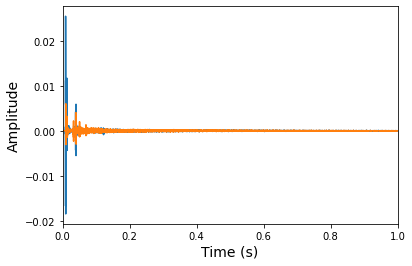

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from scipy import io
import wave
import IPython.display

# Sampling frequency
fs_ir = 48000

ir_r_mat = io.loadmat(fname_ir_r)
ir_r = ir_r_mat['h_air']
ir_l_mat = io.loadmat(fname_ir_l)
ir_l = ir_l_mat['h_air']

ir = np.zeros((2, ir_r.shape[1]))
ir[0,:] = ir_r
ir[1,:] = ir_l

t = np.arange(ir.shape[1])/fs_ir

fig = plt.figure()
ax = plt.axes()
plt.plot(t,ir[0,:], t,ir[1,:])
plt.xlabel('Time (s)', fontsize = 14)
plt.ylabel('Amplitude', fontsize = 14)
plt.xlim(0,1)
plt.show()

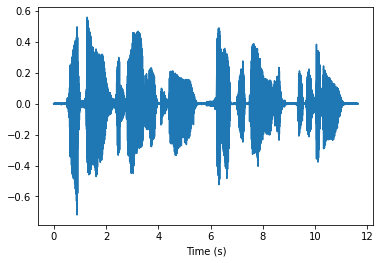

In [21]:
# Open audio file
wf = wave.open(fname, mode='rb')

# Sampling frequency
fs_sig = int(wf.getframerate())

# Samples
nsamples = wf.getnframes()

# Read to buffer
buf = wf.readframes(-1)
if wf.getsampwidth() == 2:
  data = np.frombuffer(buf, dtype='int16')/(2**(16-1))
elif wf.getsampwidth() == 4:
  data = np.frombuffer(buf, dtype='int32')/(2**(32-1))

nchannels = wf.getnchannels()
if nchannels>1:
  s = data[:: nchannels]
else:
  s = data

t = np.arange(nsamples*fs_ir/fs_sig)/fs_sig

s = signal.resample(s,int(nsamples*fs_ir/fs_sig))

# Close audio file
wf.close()

# Plot clean speech
plt.plot(t,s)
plt.xlabel("Time (s)")
plt.show()

IPython.display.Audio(s, rate=fs_ir)

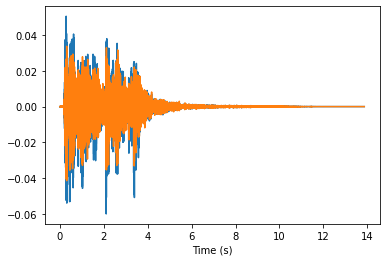

In [25]:
# generate binaural signals
sigR = np.convolve(s, ir[0,:])
sigL = np.convolve(s, ir[1,:])

sig = np.array([sigR, sigL])

# draw plots
t = np.arange(len(sigL))/fs_ir
plt.plot(t, sig.T)
plt.xlabel("Time (s)")
plt.show()

IPython.display.Audio(sig, rate=fs_ir)